## Exercicios sobre Time Series com Python

In [1]:
from pandas import read_csv
series = read_csv('champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [2]:
# Removendo os dados do ano 1972 por este ano ter menos dados
series.drop(series['1972'].index, inplace=True)

In [3]:
series

Month
1964-01-01     2815
1964-02-01     2672
1964-03-01     2755
1964-04-01     2721
1964-05-01     2946
              ...  
1971-08-01     1659
1971-09-01     5951
1971-10-01     6981
1971-11-01     9851
1971-12-01    12670
Name: Sales, Length: 96, dtype: int64

#### 01 - Plote um histograma com o seus dados

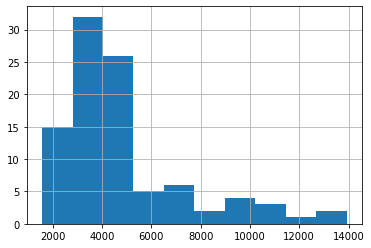

In [4]:
series.hist()

#### 02 - Plote um gráfico de disperssão entre os seus dados e o lag t+7. O que você observou? existe alguma tendência? 



O que você observou? existe alguma tendência?


Realiza-se um plot com os dados de vendas do mês atual (eixo X) e do 7º mês seguinte (eixo Y)
Os valores que ficam localizados na parte de baixo do gráfico é quando t > t+7
Os valores que ficam localizados na parte de cima do gráfico é quando t < t+7


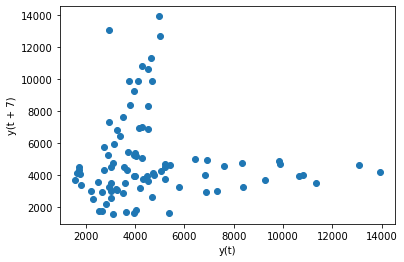

In [5]:
from pandas.plotting import lag_plot
lag_plot(series, lag=7)


print("O que você observou? existe alguma tendência?") 
print("\n")
print("Realiza-se um plot com os dados de vendas do mês atual (eixo X) e do 7º mês seguinte (eixo Y)")
print("Os valores que ficam localizados na parte de baixo do gráfico é quando t > t+7")
print("Os valores que ficam localizados na parte de cima do gráfico é quando t < t+7")


#### 03 - Remodele os dados para trabalhar com trimestres e ano, e plote um gráficos de vendas por trimestre e ano

In [6]:
resample_trimestre = series.resample('Q')

vendas_trimestre = resample_trimestre.mean()
print(vendas_trimestre.head())

Month
1964-03-31    2747.333333
1964-06-30    2901.000000
1964-09-30    2472.000000
1964-12-31    5792.333333
1965-03-31    2682.333333
Freq: Q-DEC, Name: Sales, dtype: float64


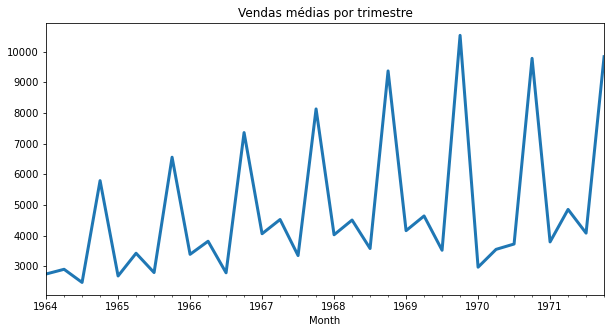

In [7]:
from matplotlib import pyplot
vendas_trimestre.plot(figsize=(10,5), linewidth=3, fontsize=10, title='Vendas médias por trimestre')
pyplot.show()

In [8]:
resample_ano = series.resample('A')

vendas_medias_por_ano = resample_ano.mean()
print(vendas_medias_por_ano.head())

Month
1964-12-31    3478.166667
1965-12-31    3864.166667
1966-12-31    4337.666667
1967-12-31    5016.000000
1968-12-31    5370.583333
Freq: A-DEC, Name: Sales, dtype: float64


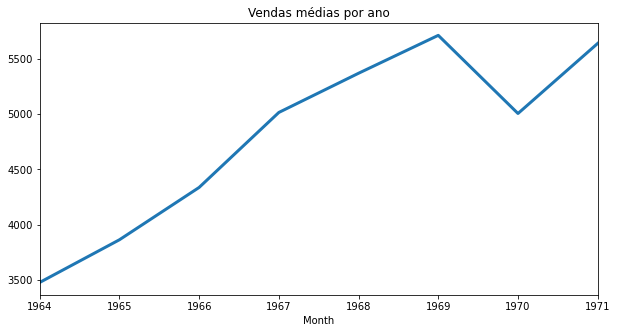

In [9]:
vendas_medias_por_ano.plot(figsize=(10,5), linewidth=3, fontsize=10, title='Vendas médias por ano')
pyplot.show()

#### 04 - Crie lags t+1, t+3 e concatene estas lags em um dataframe. Imprima o dataframe para observar como ficou os dados

In [10]:
from pandas import DataFrame
temp = DataFrame(series.values)

In [11]:
from pandas import concat
dataframe = concat([temp.shift(3), temp.shift(2), temp], axis=1)
dataframe.columns = ['t', 't+1', 't+3']
dataframe.head()

,t,t+1,t+3
0,NaN,NaN,2815
1,NaN,NaN,2672
2,NaN,2815.0,2755
3,2815.0,2672.0,2721
4,2672.0,2755.0,2946


#### 05 - Use o método Rolling para criar objetos de janela e crie variáveis usando estatísticas - ['min', 'mean', 'max', 't+1']

In [24]:
dados_deslocados = temp.shift(1)
dados_deslocados

,0
0,NaN
1,2815.0
2,2672.0
3,2755.0
4,2721.0
...,...
91,4633.0
92,1659.0
93,5951.0
94,6981.0


In [29]:
janela = dados_deslocados.rolling(window=2)
janela

Rolling [window=2,center=False,axis=0]

In [31]:
dataframe = concat([janela.min(), janela.mean(), janela.max(), temp], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
dataframe.head(10)

,min,mean,max,t+1
0,NaN,NaN,NaN,2815
1,NaN,NaN,NaN,2672
2,2672.0,2743.5,2815.0,2755
3,2672.0,2713.5,2755.0,2721
4,2721.0,2738.0,2755.0,2946
5,2721.0,2833.5,2946.0,3036
6,2946.0,2991.0,3036.0,2282
7,2282.0,2659.0,3036.0,2212
8,2212.0,2247.0,2282.0,2922
9,2212.0,2567.0,2922.0,4301
